## Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## Data Import

In [2]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## ML Classification Model

In [5]:
# Features
X = df.drop("target", axis=1).values

# Labels (Categories)
y = df['target'].values

In [6]:
# Create Scaler for Data Normalization
scaler = MinMaxScaler()
X = scaler.fit(X).transform(X.astype(float))
print(X[:3])

[[0.70833333 1.         1.         0.48113208 0.24429224 1.
  0.         0.60305344 0.         0.37096774 0.         0.
  0.33333333]
 [0.16666667 1.         0.66666667 0.33962264 0.28310502 0.
  0.5        0.88549618 0.         0.56451613 0.         0.
  0.66666667]
 [0.25       0.         0.33333333 0.33962264 0.17808219 0.
  0.         0.77099237 0.         0.22580645 1.         0.
  0.66666667]]


In [7]:
# Train/Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [8]:
# Create K-Nearest Neighbour
# and calculate accuracy for different 'Ks'
Ks = 30
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    # Train Model and Predict
    clm = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clm.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print('Maximum Accuracy achieved:', mean_acc.max())

Maximum Accuracy achieved: 0.8688524590163934


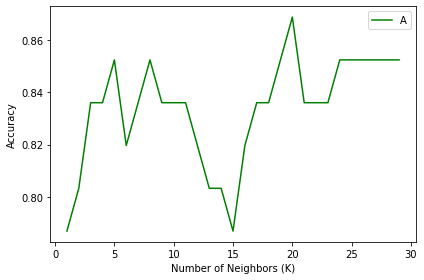

The best accuracy was with 0.8688524590163934 with k = 20


In [9]:
# Plot accuracy per K
plt.plot(range(1, Ks), mean_acc, 'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

In [10]:
# Create and Export final Model + Scaler
import pickle as pkl
clm = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train,y_train)
pkl.dump(clm, open('final_model.p','wb'))
pkl.dump(scaler, open('scaler.sav', 'wb'))